# Students Performance Analysis
**Thesis:** Does Parents’ Education Level Affect Students’ Academic Performance?

In [1]:
# 1. Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,6)

In [2]:
# 2. Load Dataset
df = pd.read_csv('StudentsPerformance.csv')  # Change path if needed
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
# 3. Add Average and Total Score
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
df['total_score'] = df[['math score', 'reading score', 'writing score']].sum(axis=1)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,218
1,female,group C,some college,standard,completed,69,90,88,82.333333,247
2,female,group B,master's degree,standard,none,90,95,93,92.666667,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,148
4,male,group C,some college,standard,none,76,78,75,76.333333,229


## Show how many students belong to each parental education category.

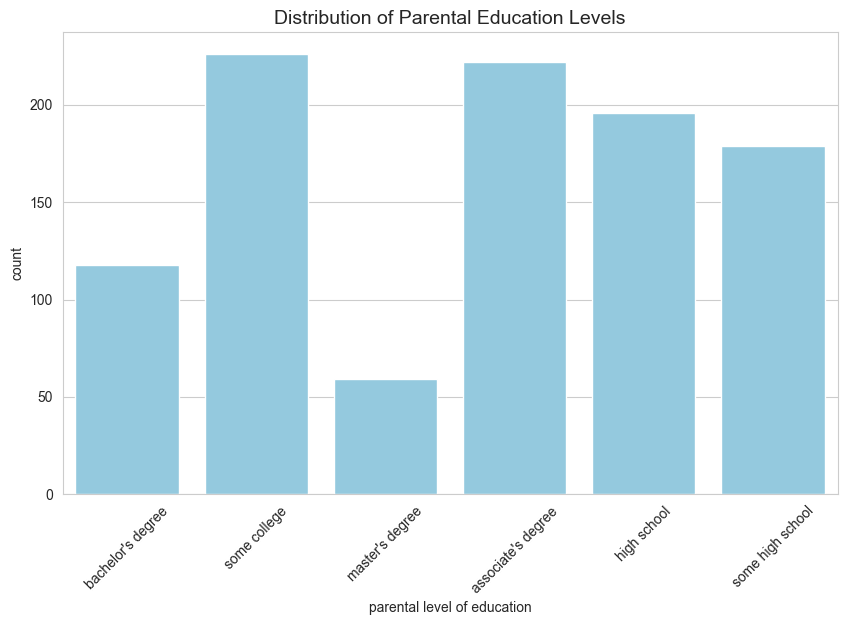

In [5]:
# 4. Distribution of Parental Education Levels
plt.figure(figsize=(10,6))
sns.countplot(
    x='parental level of education',
    data=df,
    color='skyblue'  # simple color instead of palette
)
plt.xticks(rotation=45)
plt.title("Distribution of Parental Education Levels", fontsize=14)
plt.show()



## Show the spread of students’ average scores for each parental education level

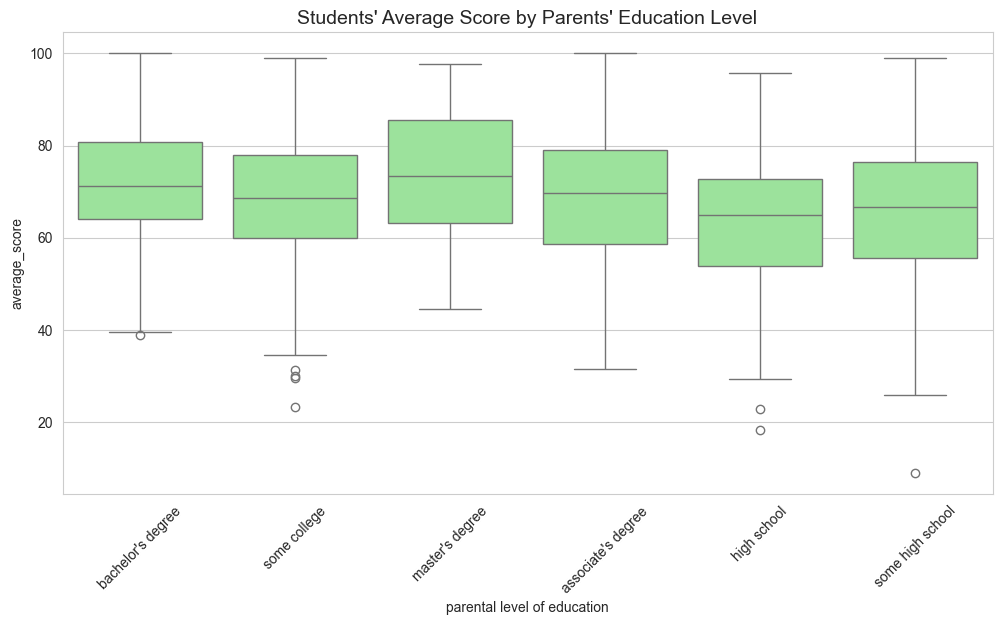

In [7]:
# 5. Average Score by Parental Education (Boxplot)
plt.figure(figsize=(12,6))
sns.boxplot(
    x='parental level of education',
    y='average_score',
    data=df,
    color='lightgreen'  # simple color instead of palette
)
plt.xticks(rotation=45)
plt.title("Students' Average Score by Parents' Education Level", fontsize=14)
plt.show()


## Compare each subject individually by parental education

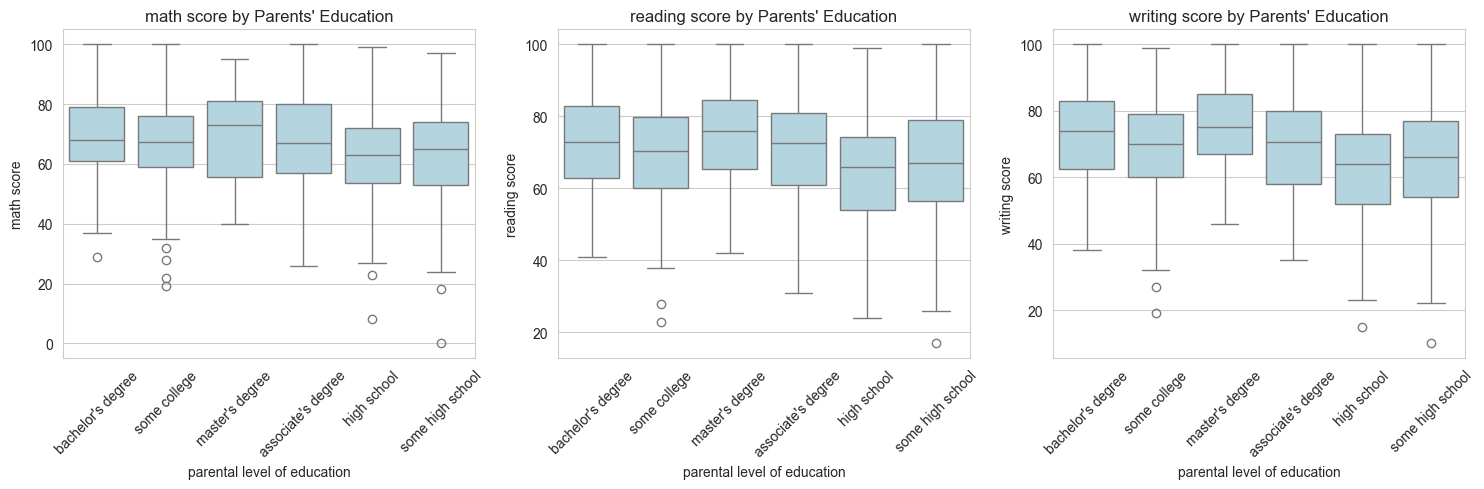

In [9]:
# 6. Scores by Subject by Parental Education
plt.figure(figsize=(15,5))
subjects = ['math score', 'reading score', 'writing score']

for i, subject in enumerate(subjects):
    plt.subplot(1, 3, i+1)
    sns.boxplot(
        x='parental level of education',
        y=subject,
        data=df,
        color='lightblue'  # single color avoids the warning
    )
    plt.xticks(rotation=45)
    plt.title(f"{subject} by Parents' Education")

plt.tight_layout()
plt.show()


In [10]:
# 7. Average Scores Table by Parental Education
avg_scores = df.groupby('parental level of education')[['math score', 'reading score', 'writing score', 'average_score']].mean().sort_values('average_score', ascending=False)
avg_scores

,math score,reading score,writing score,average_score
parental level of education,,,,
master's degree,69.745763,75.372881,75.677966,73.598870
bachelor's degree,69.389831,73.000000,73.381356,71.923729
associate's degree,67.882883,70.927928,69.896396,69.569069
some college,67.128319,69.460177,68.840708,68.476401
some high school,63.497207,66.938547,64.888268,65.108007
high school,62.137755,64.704082,62.448980,63.096939


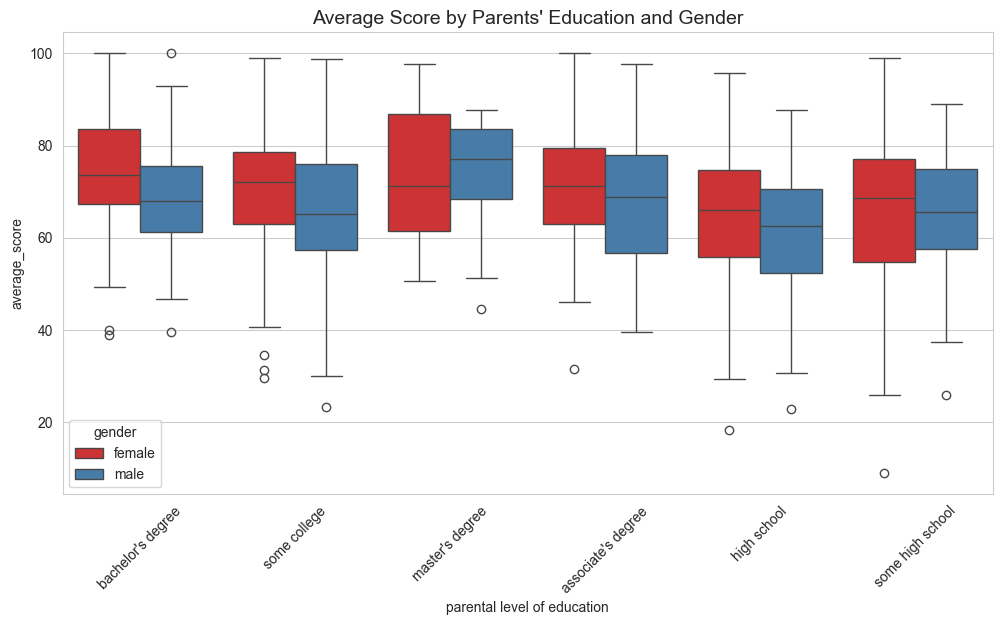

In [11]:
# 8. Optional: Gender Interaction
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='parental level of education', y='average_score', hue='gender', palette='Set1')
plt.xticks(rotation=45)
plt.title("Average Score by Parents' Education and Gender", fontsize=14)
plt.show()

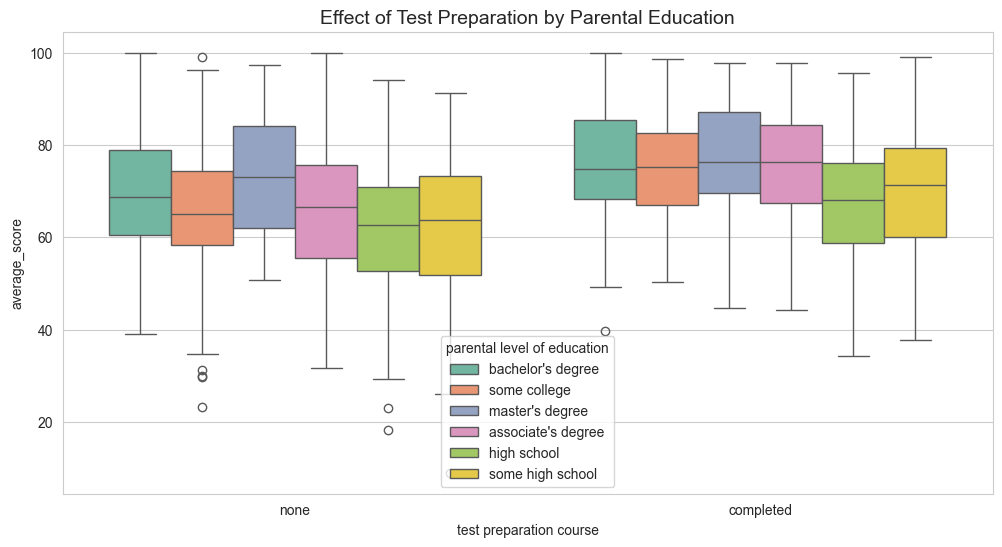

In [12]:
# 9. Optional: Test Preparation Interaction
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='test preparation course', y='average_score', hue='parental level of education', palette='Set2')
plt.title("Effect of Test Preparation by Parental Education", fontsize=14)
plt.show()